In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no


**Data Analysis**

We can see that most of the clients are between the ages of about 28 and 42 years old.

<Axes: >

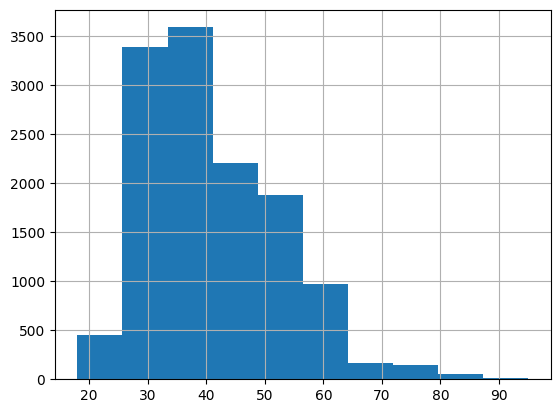

In [4]:
df['age'].hist()

In [5]:
df['job'].unique()

array(['technician', 'services', 'management', 'admin.', 'student',
       'blue-collar', 'housemaid', 'retired', 'unemployed',
       'self-employed', 'unknown', 'entrepreneur'], dtype=object)

In [6]:
job_dictionary = {'technician': 0 , 'services': 1 , 'management': 2 , 'admin.': 3,
                    'student': 4, 'blue-collar': 5 , 'housemaid': 6, 'retired': 7,
                    'unemployed': 8, 'self-employed': 9, 'unknown': 10, 'entrepreneur': 11
                  }
df['job'] = [job_dictionary[job] for job in df['job']]

In [7]:
df['job']

0         0
1         1
2         2
3         0
4         3
         ..
12865     0
12866    10
12867     8
12868     2
12869     1
Name: job, Length: 12870, dtype: int64

We can see that the bank has clients mostly working as technicians, services and blue-collar positions.

<Axes: >

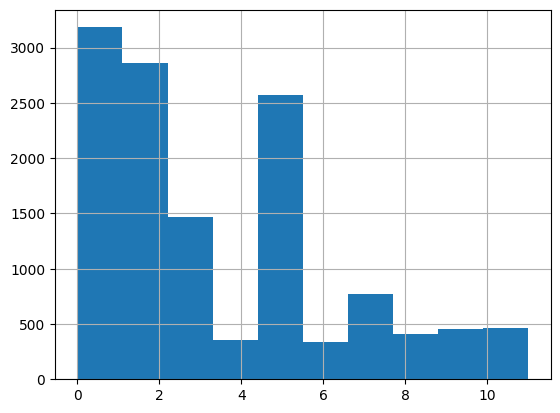

In [8]:
df['job'].hist()

We can see that most of the bank's clients are married.

<Axes: >

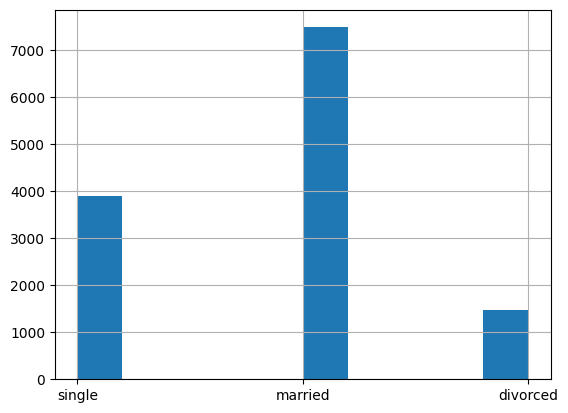

In [9]:
df['marital'].hist()

We can see that most of the bank's clients have a secondary education.

<Axes: >

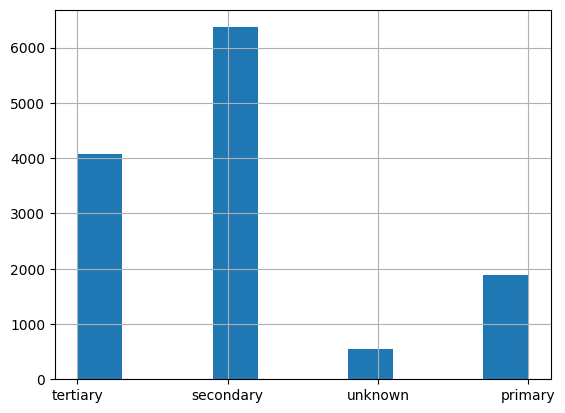

In [10]:
df['education'].hist()

We can see that most clients do not have credit in default.

<Axes: >

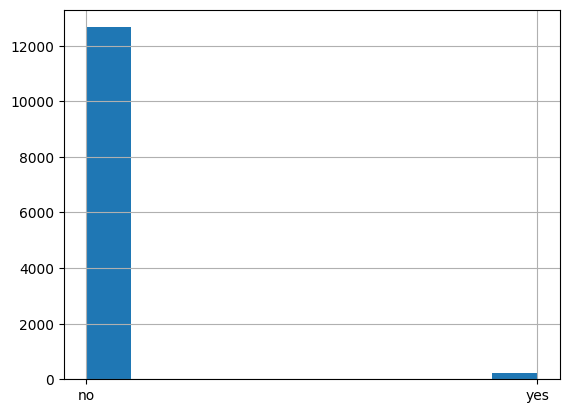

In [11]:
df['default'].hist()

We can see that most clients have less than $2000 in their balance account.

<Axes: >

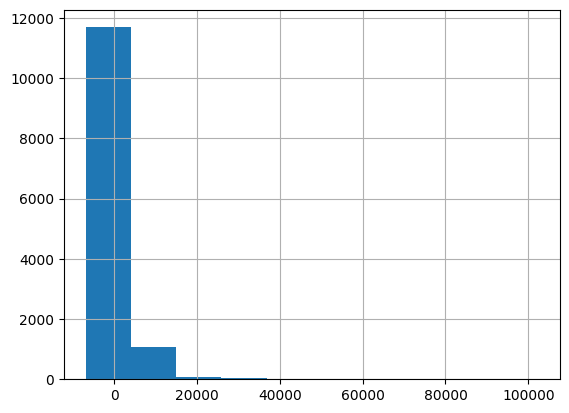

In [12]:
df['balance'].hist()

We can see that the ratio of clients that have housing versus those who do not are fairly proportional.

<Axes: >

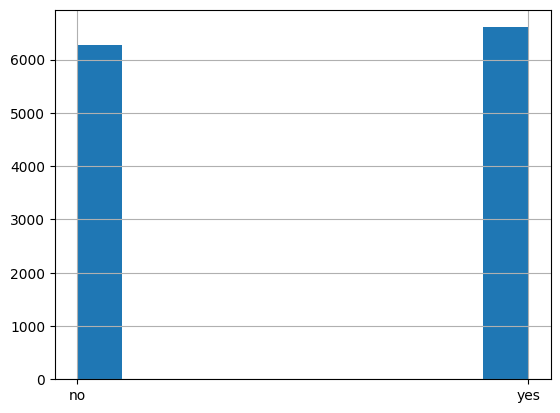

In [13]:
df['housing'].hist()

We can see that most clients do not have a personal loan.

<Axes: >

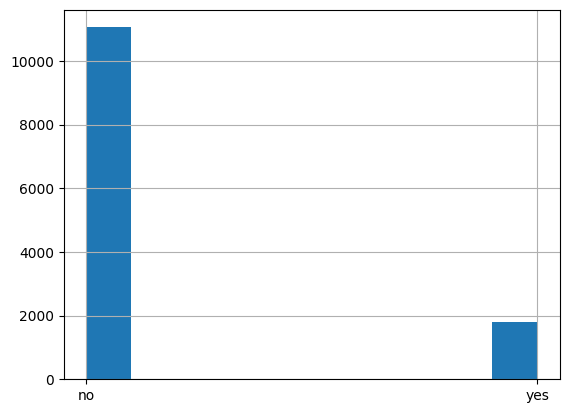

In [14]:
df['loan'].hist()

We can see that most clients were contacted in around the 20th day.

<Axes: >

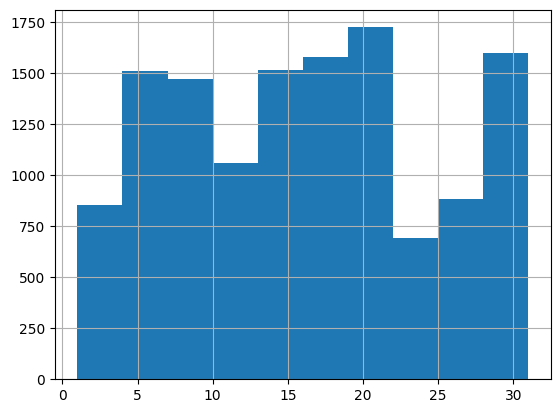

In [15]:
df['day'].hist()

<Axes: >

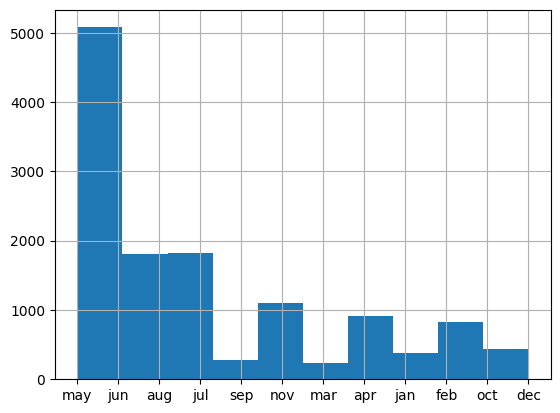

In [16]:
df['month'].hist()

<Axes: >

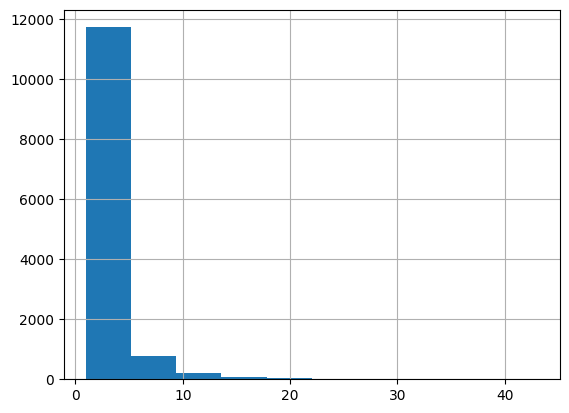

In [17]:
df['campaign'].hist()

We can see that most clients were last contacted between 0 and 100 days.

<Axes: >

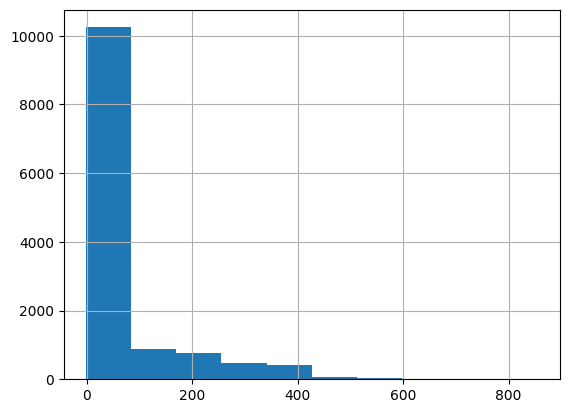

In [18]:
df['pdays'].hist()

We can see that the bank had an average of about 3 contacts per client before the campaign.

<Axes: >

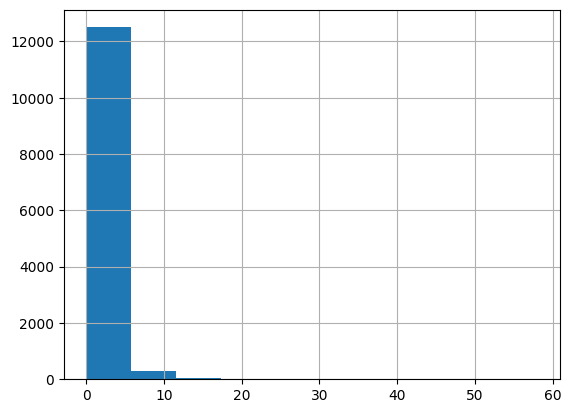

In [19]:
df['previous'].hist()

We can see that the result of the previous marketing campaign was unkown for most of the clients.

<Axes: >

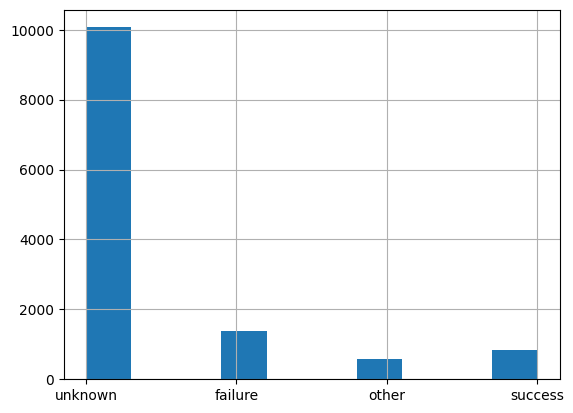

In [20]:
df['poutcome'].hist()

**Pre-processing**

There are no null values within the dataset - no need to account for them.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  int64 
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.7+ MB


Need to account for other columns in the dataset that contains text/strings and convert them to values. The job column was already taken care of earlier.

In [22]:
df['marital'].unique()

array(['single', 'married', 'divorced'], dtype=object)

In [23]:
marital_dictionary = {'single': 0 , 'married': 1 , 'divorced': 2}
df['marital'] = [marital_dictionary[status] for status in df['marital']]

In [24]:
df['marital']

0        0
1        0
2        0
3        1
4        0
        ..
12865    1
12866    1
12867    0
12868    1
12869    0
Name: marital, Length: 12870, dtype: int64

In [25]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [26]:
education_dictionary = {'tertiary': 0 , 'secondary': 1 , 'primary': 2 , 'unknown': 3}
df['education'] = [education_dictionary[ed] for ed in df['education']]

In [27]:
df['education']

0        0
1        1
2        1
3        3
4        1
        ..
12865    1
12866    1
12867    0
12868    0
12869    1
Name: education, Length: 12870, dtype: int64

In [28]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [29]:
default_dictionary = {'yes': 1 , 'no': 0}
df['default'] = [default_dictionary[sc] for sc in df['default']]

In [30]:
df['default']

0        0
1        0
2        0
3        0
4        0
        ..
12865    0
12866    0
12867    0
12868    0
12869    0
Name: default, Length: 12870, dtype: int64

In [31]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [32]:
housing_dictionary = {'yes': 1 , 'no': 0}
df['housing'] = [housing_dictionary[hs] for hs in df['housing']]

In [33]:
df['housing']

0        0
1        1
2        0
3        1
4        0
        ..
12865    1
12866    0
12867    1
12868    1
12869    0
Name: housing, Length: 12870, dtype: int64

In [34]:
loan_dictionary = {'yes': 1 , 'no': 0}
df['loan'] = [loan_dictionary[hs] for hs in df['loan']]

In [35]:
df['loan']

0        0
1        1
2        0
3        0
4        1
        ..
12865    0
12866    0
12867    0
12868    0
12869    0
Name: loan, Length: 12870, dtype: int64

In [36]:
df['month'].unique()

array(['may', 'jun', 'aug', 'jul', 'sep', 'nov', 'mar', 'apr', 'jan',
       'feb', 'oct', 'dec'], dtype=object)

In [37]:
month_dictionary = {'may': 0, 'jun': 1, 'aug': 2, 'jul': 3,
                    'sep': 4 , 'nov': 5 , 'mar': 6, 'apr': 7,
                    'jan': 8 , 'feb': 9 , 'oct': 10 , 'dec': 11
                    }
df['month'] = [month_dictionary[month] for month in df['month']]

In [38]:
df['month']

0        0
1        1
2        2
3        3
4        4
        ..
12865    7
12866    5
12867    5
12868    0
12869    0
Name: month, Length: 12870, dtype: int64

In [39]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [40]:
poutcome_dictionary = {'success': 0 , 'failure': 1, 'other': 2 , 'unknown': 3}
df['poutcome'] = [poutcome_dictionary[pout] for pout in df['poutcome']]

In [41]:
df['poutcome']

0        3
1        3
2        3
3        3
4        3
        ..
12865    1
12866    1
12867    1
12868    3
12869    3
Name: poutcome, Length: 12870, dtype: int64

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

In [43]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [44]:
y_dictionary = {'yes':1,'no':0}
df['y'] = [y_dictionary[y] for y in df['y']]

In [45]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [46]:
contact_dictionary = {'cellular': 0 , 'telephone': 1 , 'unknown': 2}
df['contact'] = [contact_dictionary[contact] for contact in df['contact']]

**Normalization & Selecting Best Features**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif

In [49]:
x = df[['job','marital','education','default','balance','housing',
       'loan','day','month','campaign','contact','pdays','previous','poutcome']].values
y = df['y'].values

In [50]:
print(x)
x.shape

[[  0   0   0 ...  -1   0   3]
 [  1   0   1 ...  -1   0   3]
 [  2   0   1 ...  -1   0   3]
 ...
 [  8   0   0 ... 172   2   1]
 [  2   1   0 ...  -1   0   3]
 [  1   0   1 ...  -1   0   3]]


(12870, 14)

In [51]:
print(y)
y.shape

[0 0 0 ... 0 0 0]


(12870,)

In [52]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [248]:
k_best = SelectKBest(score_func=f_classif, k=11)
best_features = k_best.fit_transform(x,y)
print(best_features)

[[-1.31182593 -1.15633694  5.06511556 ... -0.44574006 -0.33614417
   0.49283882]
 [-1.31182593  0.10817631 -0.29350528 ... -0.44574006 -0.33614417
   0.49283882]
 [-1.31182593  0.10817631 -0.40737069 ... -0.44574006 -0.33614417
   0.49283882]
 ...
 [-1.31182593 -1.15633694 -0.05067296 ...  1.21062851  0.6396482
  -1.6682636 ]
 [ 0.30533879 -1.15633694 -0.30347228 ... -0.44574006 -0.33614417
   0.49283882]
 [-1.31182593  0.10817631 -0.44814478 ... -0.44574006 -0.33614417
   0.49283882]]


In [337]:
selected_indexes = k_best.get_support()
selected_features = [feature_label for feature_label, selected in zip(df.columns.values.tolist(), selected_indexes) if selected]
print("Selected Features: ",selected_features)

Selected Features:  ['age', 'job', 'education', 'default', 'balance', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays']


In [338]:
x_best = df[['age', 'job', 'education', 'default', 'balance', 'loan', 'contact',
             'day', 'month', 'campaign', 'pdays']].values
sc_x_best = StandardScaler()
x_best = sc_x_best.fit_transform(x_best)

In [339]:
print(x_best)
x_best.shape

[[-1.06952791 -1.23679807 -1.15633694 ... -1.00015052 -0.23019162
  -0.44574006]
 [-1.33489437 -0.88497367  0.10817631 ... -0.67745662  0.11904404
  -0.44574006]
 [-0.98107242 -0.53314928  0.10817631 ... -0.35476271 -0.23019162
  -0.44574006]
 ...
 [-0.36188399  1.57779709 -1.15633694 ...  0.61331901 -0.57942728
   1.21062851]
 [ 0.08039346 -0.53314928 -1.15633694 ... -1.00015052 -0.23019162
  -0.44574006]
 [-1.51180535 -0.88497367  0.10817631 ... -1.00015052 -0.57942728
  -0.44574006]]


(12870, 11)

In [340]:
y.shape

(12870,)

**Train/Test Split**

In [341]:
from sklearn.model_selection import train_test_split

In [342]:
x_train,x_test,y_train,y_test = train_test_split(x_best,y,test_size=0.2,random_state=42)

In [343]:
x_train.shape

(10296, 11)

In [344]:
x_test.shape

(2574, 11)

In [345]:
print(x_train)

[[-0.09651752 -1.23679807 -1.15633694 ... -0.0320688  -0.23019162
  -0.44574006]
 [-0.62725046  0.52232391  0.10817631 ...  0.61331901 -0.23019162
   0.82765312]
 [ 1.40722581  1.2259727   2.63720281 ... -0.35476271  2.21445802
  -0.44574006]
 ...
 [-1.06952791  0.52232391  1.37268956 ... -0.67745662 -0.23019162
  -0.44574006]
 [ 0.87649287 -1.23679807  0.10817631 ... -0.35476271  0.46827971
  -0.44574006]
 [-1.33489437  1.92962149 -1.15633694 ... -1.00015052  0.11904404
  -0.44574006]]


**Model Selection**

Logistic Regression Model

In [346]:
from sklearn.linear_model import LogisticRegression

In [347]:
lgModel = LogisticRegression()
lgModel.fit(x_train,y_train)

LogisticRegression()

In [348]:
lgModel.score(x_test,y_test)

0.7144522144522144

SGD Classifier

In [349]:
from sklearn.linear_model import SGDClassifier

In [350]:
sgdModel = SGDClassifier(max_iter=2000, tol=1e-3)
sgdModel.fit(x_train,y_train)

SGDClassifier(max_iter=2000)

In [351]:
sgdModel.score(x_test,y_test)

0.709013209013209

Gaussian Process Model

In [332]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [335]:
gpModel = GaussianProcessClassifier()
gpModel.fit(x_train,y_train)

GaussianProcessClassifier()

In [352]:
gpModel.score(x_test,y_test)

0.7750582750582751

Support Vector Machine Model

In [281]:
from sklearn import svm

In [282]:
svmModel = svm.SVC()
svmModel.fit(x_train,y_train)

SVC()

In [283]:
svmModel.score(x_test,y_test)

0.7622377622377622

KNeighbours Model

In [284]:
from sklearn.neighbors import KNeighborsClassifier

In [285]:
KnModel = KNeighborsClassifier()
KnModel.fit(x_train,y_train)

KNeighborsClassifier()

In [286]:
KnModel.score(x_test,y_test)

0.7408702408702409

Perceptron Model

In [287]:
from sklearn.linear_model import Perceptron

In [288]:
perceptronModel = Perceptron()
perceptronModel.fit(x_train,y_train)

Perceptron()

In [289]:
perceptronModel.score(x_test,y_test)

0.642968142968143

RandomForest Model

In [290]:
from sklearn.ensemble import RandomForestClassifier

In [291]:
forestModel = RandomForestClassifier()
forestModel.fit(x_train,y_train)

RandomForestClassifier()

In [293]:
forestModel.score(x_test,y_test)

0.7905982905982906

GradientBoosting Model

In [294]:
 from sklearn.ensemble import GradientBoostingClassifier

In [295]:
gbModel = GradientBoostingClassifier(learning_rate=0.1)
gbModel.fit(x_train,y_train)

GradientBoostingClassifier()

In [296]:
gbModel.score(x_test,y_test)

0.7913752913752914

ExtraTrees Model

In [297]:
 from sklearn.ensemble import ExtraTreesClassifier

In [298]:
xtreeModel = ExtraTreesClassifier()
xtreeModel.fit(x_train,y_train)

ExtraTreesClassifier()

In [299]:
xtreeModel.score(x_test,y_test)

0.7738927738927739

DecisionTrees Model

In [300]:
from sklearn.tree import DecisionTreeClassifier

In [301]:
dtModel = DecisionTreeClassifier()
dtModel.fit(x_train,y_train)

DecisionTreeClassifier()

In [302]:
dtModel.score(x_test,y_test)

0.6825951825951826

HistGradientBoosting Model

In [303]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [304]:
hgbModel = HistGradientBoostingClassifier()
hgbModel.fit(x_train,y_train)

HistGradientBoostingClassifier()

In [305]:
hgbModel.score(x_test,y_test)

0.8038073038073038

AdaBoost Model

In [306]:
from sklearn.ensemble import AdaBoostClassifier

In [307]:
adbModel = AdaBoostClassifier()
adbModel.fit(x_train,y_train)

AdaBoostClassifier()

In [308]:
adbModel.score(x_test,y_test)

0.7715617715617715

MLP Model

In [309]:
from sklearn.neural_network import MLPClassifier

In [310]:
mlpModel = MLPClassifier()
mlpModel.fit(x_train,y_train)

MLPClassifier()

In [311]:
mlpModel.score(x_test,y_test)

0.7641802641802642

Tensorflow

In [145]:
import tensorflow as tf

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [166]:
sqModel = Sequential([
    Dense(150, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [167]:
sqModel.compile(optimizer='sgd',loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.BinaryAccuracy()])

In [168]:
sqModel.fit(x_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
103/103 [==============================] - 1s 2ms/step - loss: 0.6524 - binary_accuracy: 0.6266
Epoch 2/50
103/103 [==============================] - 0s 2ms/step - loss: 0.6015 - binary_accuracy: 0.6909
Epoch 3/50
103/103 [==============================] - 0s 2ms/step - loss: 0.5834 - binary_accuracy: 0.6949
Epoch 4/50
103/103 [==============================] - 0s 2ms/step - loss: 0.5737 - binary_accuracy: 0.7009
Epoch 5/50
103/103 [==============================] - 0s 2ms/step - loss: 0.5678 - binary_accuracy: 0.7061
Epoch 6/50
103/103 [==============================] - 0s 2ms/step - loss: 0.5639 - binary_accuracy: 0.7121
Epoch 7/50
103/103 [==============================] - 0s 2ms/step - loss: 0.5611 - binary_accuracy: 0.7169
Epoch 8/50
103/103 [==============================] - 0s 2ms/step - loss: 0.5590 - binary_accuracy: 0.7196
Epoch 9/50
103/103 [==============================] - 0s 2ms/step - loss: 0.5573 - binary_accuracy: 0.7206
Epoch 10/50
103/103 [================

In [169]:
sqModel.evaluate(x_test,y_test)

81/81 [==============================] - 0s 2ms/step - loss: 0.5344 - binary_accuracy: 0.7475


[0.5343524813652039, 0.747474730014801]

**Predictions**

In [312]:
df_test = pd.read_csv('test.csv')

In [313]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,53608,32,management,single,tertiary,no,12569,no,no,cellular,1,jul,2,295,2,success
1,51055,25,services,single,secondary,no,801,no,no,cellular,5,jun,2,-1,0,unknown
2,52573,46,blue-collar,married,secondary,no,1728,yes,no,unknown,26,may,2,-1,0,unknown
3,50458,39,management,divorced,secondary,no,51,no,no,unknown,17,jun,2,-1,0,unknown
4,52272,31,services,single,tertiary,no,1626,no,no,unknown,31,jul,1,-1,0,unknown


In [314]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4291 non-null   int64 
 1   age        4291 non-null   int64 
 2   job        4291 non-null   object
 3   marital    4291 non-null   object
 4   education  4291 non-null   object
 5   default    4291 non-null   object
 6   balance    4291 non-null   int64 
 7   housing    4291 non-null   object
 8   loan       4291 non-null   object
 9   contact    4291 non-null   object
 10  day        4291 non-null   int64 
 11  month      4291 non-null   object
 12  campaign   4291 non-null   int64 
 13  pdays      4291 non-null   int64 
 14  previous   4291 non-null   int64 
 15  poutcome   4291 non-null   object
dtypes: int64(7), object(9)
memory usage: 536.5+ KB


In [315]:
# poutcome_dictionary = {'success': 0 , 'failure': 1, 'other': 2 , 'unknown': 3}
df_test['poutcome'] = [poutcome_dictionary[pout] for pout in df_test['poutcome']]
df_test['poutcome']

0       0
1       3
2       3
3       3
4       3
       ..
4286    3
4287    0
4288    3
4289    2
4290    3
Name: poutcome, Length: 4291, dtype: int64

In [316]:
# month_dictionary = {'may': 0, 'jun': 1, 'aug': 2, 'jul': 3,
#                     'sep': 4 , 'nov': 5 , 'mar': 6, 'apr': 7,
#                     'jan': 8 , 'feb': 9 , 'oct': 10 , 'dec': 11
#                     }
df_test['month'] = [month_dictionary[month] for month in df_test['month']]
df_test['month']

0       3
1       1
2       0
3       1
4       3
       ..
4286    9
4287    5
4288    5
4289    3
4290    2
Name: month, Length: 4291, dtype: int64

In [317]:
# loan_dictionary = {'yes': 1 , 'no': 0}
df_test['loan'] = [loan_dictionary[hs] for hs in df_test['loan']]
df_test['loan']

0       0
1       0
2       0
3       0
4       0
       ..
4286    0
4287    0
4288    0
4289    0
4290    0
Name: loan, Length: 4291, dtype: int64

In [318]:
# housing_dictionary = {'yes': 1 , 'no': 0}
df_test['housing'] = [housing_dictionary[hs] for hs in df_test['housing']]
df_test['housing']

0       0
1       0
2       1
3       0
4       0
       ..
4286    0
4287    0
4288    1
4289    0
4290    0
Name: housing, Length: 4291, dtype: int64

In [319]:
# default_dictionary = {'yes': 1 , 'no': 0}
df_test['default'] = [default_dictionary[sc] for sc in df_test['default']]
df_test['default']

0       0
1       0
2       0
3       0
4       0
       ..
4286    0
4287    0
4288    0
4289    0
4290    0
Name: default, Length: 4291, dtype: int64

In [320]:
# education_dictionary = {'tertiary': 0 , 'secondary': 1 , 'primary': 2 , 'unknown': 3}
df_test['education'] = [education_dictionary[ed] for ed in df_test['education']]
df_test['education']

0       0
1       1
2       1
3       1
4       0
       ..
4286    1
4287    1
4288    1
4289    1
4290    2
Name: education, Length: 4291, dtype: int64

In [321]:
# marital_dictionary = {'single': 0 , 'married': 1 , 'divorced': 2}
df_test['marital'] = [marital_dictionary[status] for status in df_test['marital']]
df_test['marital']

0       0
1       0
2       1
3       2
4       0
       ..
4286    1
4287    1
4288    1
4289    1
4290    1
Name: marital, Length: 4291, dtype: int64

In [322]:
# job_dictionary = {'technician': 0 , 'services': 1 , 'management': 2 , 'admin.': 3,
#                     'student': 4, 'blue-collar': 5 , 'housemaid': 6, 'retired': 7,
#                     'unemployed': 8, 'self-employed': 9, 'unknown': 10, 'entrepreneur': 11
#                   }
df_test['job'] = [job_dictionary[job] for job in df_test['job']]
df_test['job']

0       2
1       1
2       5
3       2
4       1
       ..
4286    3
4287    0
4288    3
4289    5
4290    9
Name: job, Length: 4291, dtype: int64

In [323]:
# contact_dictionary = {'cellular': 0 , 'telephone': 1 , 'unknown': 2}
df_test['contact'] = [contact_dictionary[contact] for contact in df_test['contact']]
df_test['contact']

0       0
1       0
2       2
3       2
4       2
       ..
4286    1
4287    0
4288    0
4289    0
4290    0
Name: contact, Length: 4291, dtype: int64

In [326]:
x_test = df_test[['age', 'job', 'education', 'default', 'balance', 'loan', 'contact',
                  'day', 'month', 'campaign', 'pdays']].values

In [327]:
x_test = sc_x.fit_transform(x_test)
print(x_test)
x_test.shape

[[-0.78845443 -0.51811067 -1.18334243 ... -0.0506091  -0.2152571
   2.39062336]
 [-1.40725684 -0.86624924  0.07632573 ... -0.69982774 -0.2152571
  -0.4548694 ]
 [ 0.44915038  0.52630503  0.07632573 ... -1.02443706 -0.2152571
  -0.4548694 ]
 ...
 [-0.08125168 -0.1699721   0.07632573 ...  0.59860955 -0.56699671
  -0.4548694 ]
 [-0.16965202  0.52630503  0.07632573 ... -0.0506091  -0.2152571
   2.20797349]
 [ 0.44915038  1.91885929  1.33599389 ... -0.37521842  1.19170134
  -0.4548694 ]]


(4291, 11)

In [328]:
y_pred = hgbModel.predict(x_test)
print(y_pred)

[1 1 0 ... 0 1 0]


In [329]:
df_submission = {'ID': df_test['ID'], 'y': y_pred}
df_submission = pd.DataFrame(data=df_submission)

In [330]:
df_submission.head()

,ID,y
0,53608,1
1,51055,1
2,52573,0
3,50458,0
4,52272,0


In [331]:
df_submission.to_csv('JK_Submission.csv', index=False)